# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boguchany
Processing Record 2 of Set 1 | degerfors
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | rio negrinho
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | kodinar
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | khandyga
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | shantobe
Processing Record 14 of Set 1 | parral
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | mejit
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | chamical
Processing Record 22 of Set 1 | port-gentil
Proc

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boguchany,58.3814,97.4531,-15.08,98,40,0.89,RU,1699496265
1,degerfors,59.2380,14.4308,3.71,95,100,2.32,SE,1699496265
2,yellowknife,62.4560,-114.3525,-7.71,93,75,1.54,CA,1699496267
3,rio negrinho,-26.2544,-49.5183,21.08,85,100,0.32,BR,1699496267
4,olonkinbyen,70.9221,-8.7187,-0.48,74,98,4.25,SJ,1699496268


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,-15.08,98,40,0.89,RU,1699496265
1,degerfors,59.2380,14.4308,3.71,95,100,2.32,SE,1699496265
2,yellowknife,62.4560,-114.3525,-7.71,93,75,1.54,CA,1699496267
3,rio negrinho,-26.2544,-49.5183,21.08,85,100,0.32,BR,1699496267
4,olonkinbyen,70.9221,-8.7187,-0.48,74,98,4.25,SJ,1699496268


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

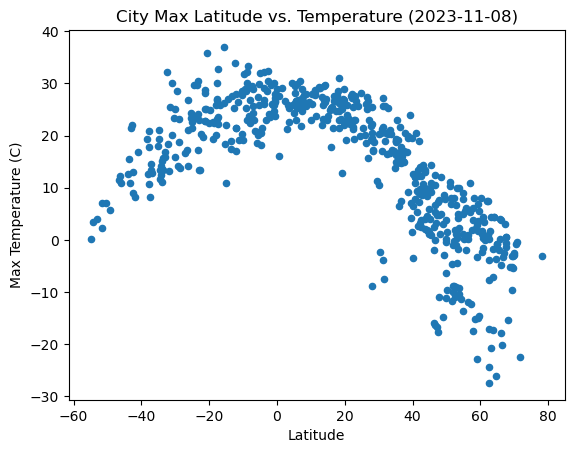

In [24]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

title = 'City Max Latitude vs. Temperature (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', title = title, xlabel = xlabel, ylabel = ylabel)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

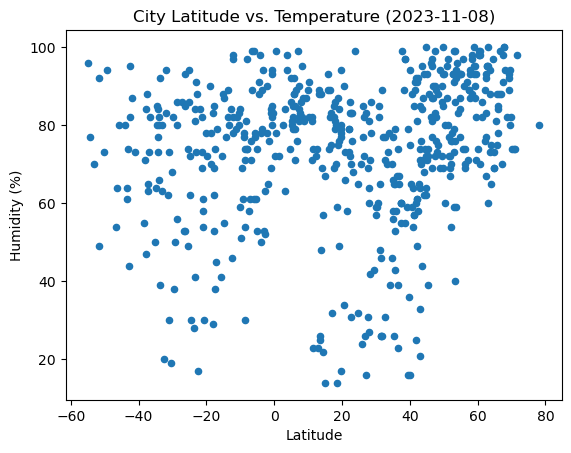

In [25]:
# Build the scatter plots for latitude vs. humidity

title = 'City Latitude vs. Humidity (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

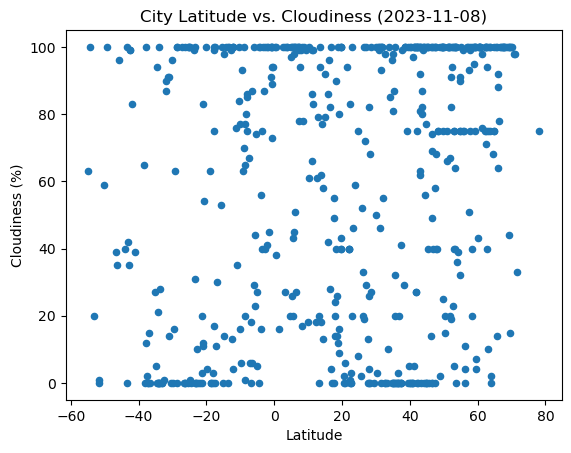

In [26]:
# Build the scatter plots for latitude vs. cloudiness
title = 'City Latitude vs. Cloudiness (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

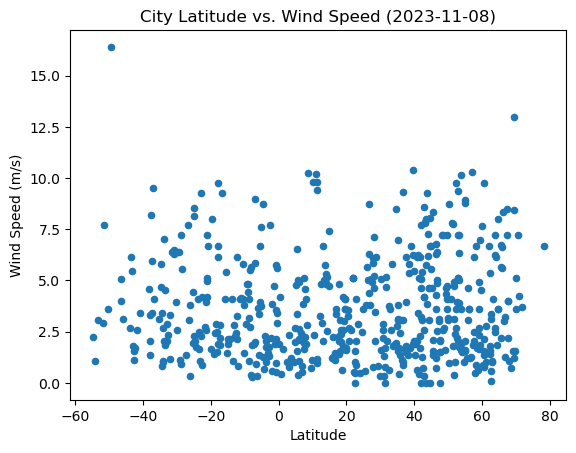

In [28]:
# Build the scatter plots for latitude vs. wind speed
title = 'City Latitude vs. Wind Speed (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Wind Speed (m/s)'
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', title = title, xlabel = xlabel, ylabel = ylabel)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,-15.08,98,40,0.89,RU,1699496265
1,degerfors,59.2380,14.4308,3.71,95,100,2.32,SE,1699496265
2,yellowknife,62.4560,-114.3525,-7.71,93,75,1.54,CA,1699496267
3,rio negrinho,-26.2544,-49.5183,21.08,85,100,0.32,BR,1699496267
4,olonkinbyen,70.9221,-8.7187,-0.48,74,98,4.25,SJ,1699496268


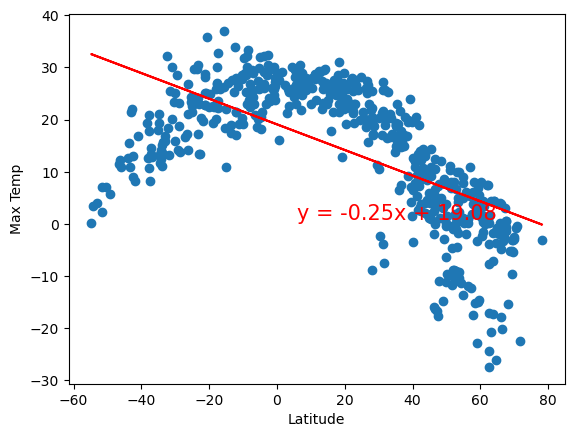

In [30]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import scipy.stats as st


#City Latitude vs. Temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



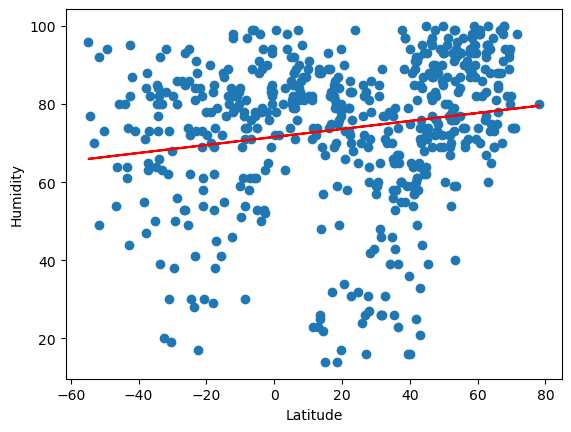

In [7]:
#City Latitude vs. Humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

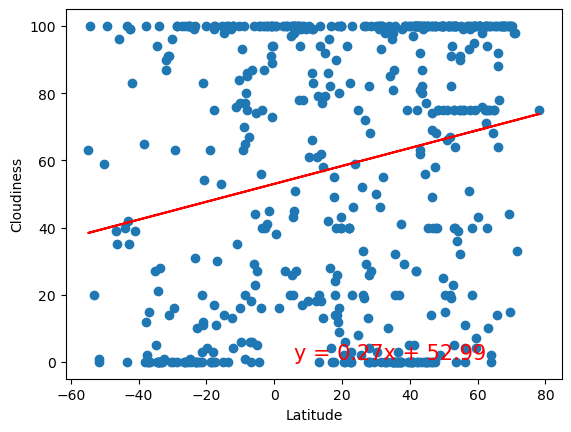

In [6]:
#City Latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']

x_values = lat
y_values = cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

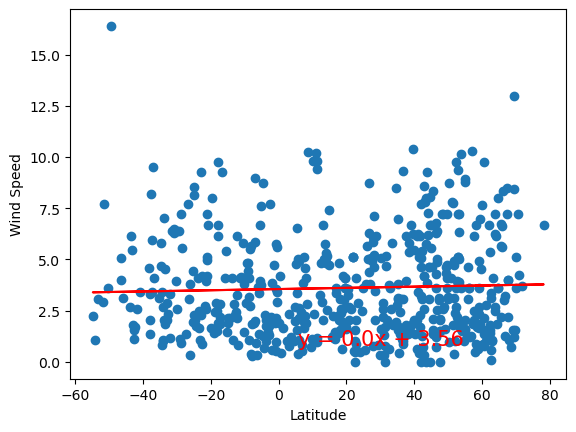

In [8]:
#City Latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

city_data_df_NH = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
city_data_df_NH.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,-15.08,98,40,0.89,RU,1699496265
1,degerfors,59.2380,14.4308,3.71,95,100,2.32,SE,1699496265
2,yellowknife,62.4560,-114.3525,-7.71,93,75,1.54,CA,1699496267
4,olonkinbyen,70.9221,-8.7187,-0.48,74,98,4.25,SJ,1699496268
5,bilibino,68.0546,166.4372,-15.31,94,100,1.09,RU,1699496268


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_data_df_SH = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
city_data_df_SH.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rio negrinho,-26.2544,-49.5183,21.08,85,100,0.32,BR,1699496267
9,edinburgh of the seven seas,-37.0676,-12.3116,13.32,73,15,9.49,SH,1699496270
10,papatowai,-46.5619,169.4708,11.57,54,39,5.05,NZ,1699496271
11,invercargill,-46.4000,168.3500,12.23,64,35,4.02,NZ,1699496272
16,west island,-12.1568,96.8225,27.99,78,100,6.17,CC,1699496273


###  Temperature vs. Latitude Linear Regression Plot

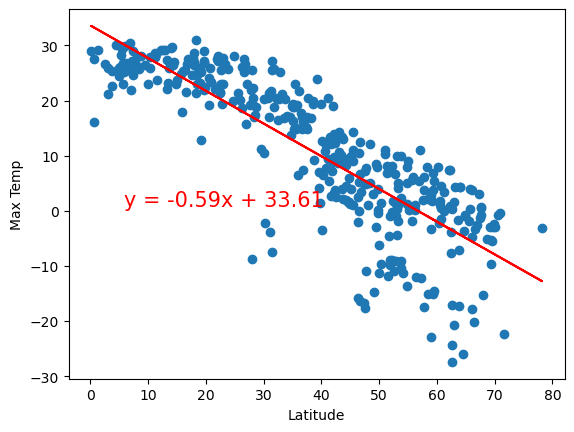

In [11]:
# Linear regression on Northern Hemisphere
#City Latitude vs. Temperature

lat = city_data_df_NH['Lat']
temp = city_data_df_NH['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


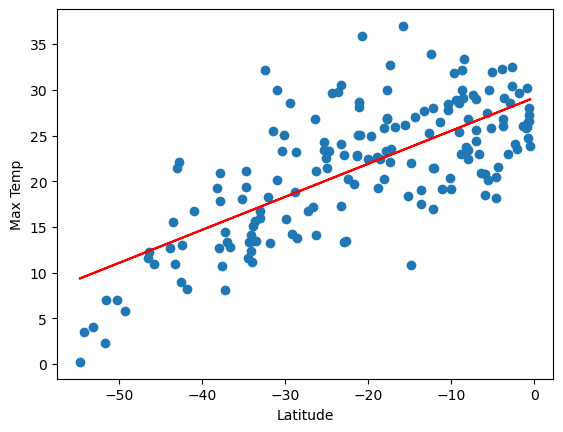

In [12]:
# Linear regression on Southern Hemisphere
lat = city_data_df_SH['Lat']
temp = city_data_df_SH['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


**Discussion about the linear relationship:** 

Because of the negative values associated with the southern hemisphere, building a regression that includes both N & S hemispheres creates a line of best fit that is not well modeled to the data.  By separating the positive (N) and negative (S) values of latitude, a much more predictive linear relationship is obtained.

### Humidity vs. Latitude Linear Regression Plot

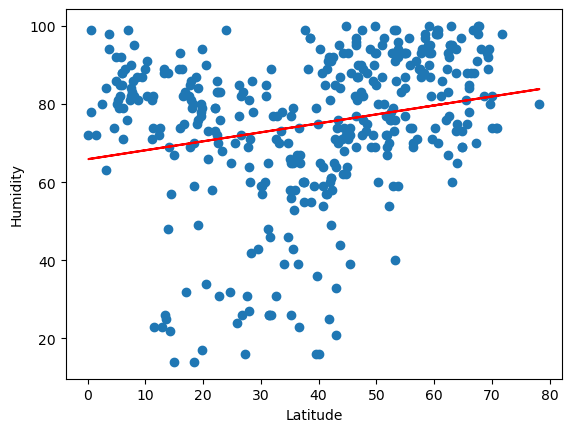

The R values is 0.22504651458001004


In [13]:
# Northern Hemisphere
lat = city_data_df_NH['Lat']
humidity = city_data_df_NH['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The R values is {rvalue}')

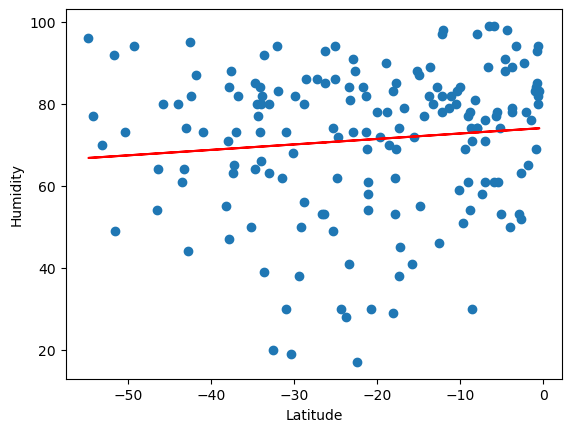

The R values is 0.10568198166690554


In [14]:
# Southern Hemisphere
lat = city_data_df_SH['Lat']
humidity = city_data_df_SH['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** Far less of the variance (r value) is explained, and both N & S hemispheres appear to get more humid the further north you go. 

### Cloudiness vs. Latitude Linear Regression Plot

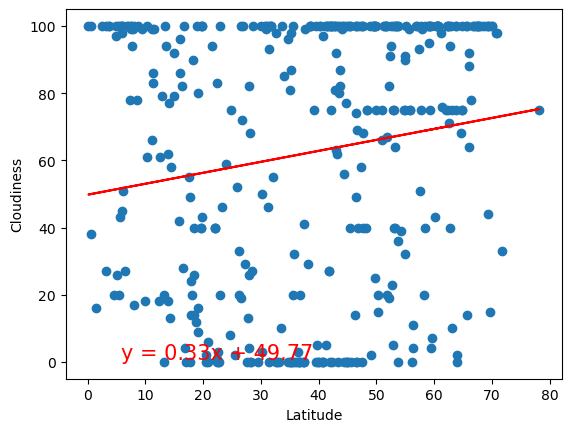

The R values is 0.1583532899563093


In [15]:
# Northern Hemisphere

lat = city_data_df_NH['Lat']
Cloudiness = city_data_df_NH['Cloudiness']

x_values = lat
y_values = Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The R values is {rvalue}')

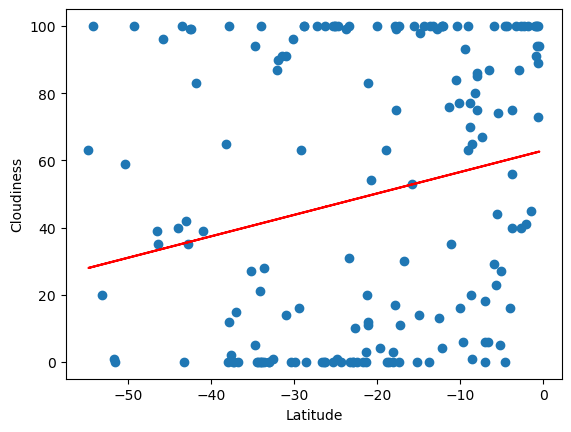

The R values is 0.21866573453088423


In [16]:
# Southern Hemisphere
lat = city_data_df_SH['Lat']
Cloudiness = city_data_df_SH['Cloudiness']

x_values = lat
y_values = Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** There is another positive linear relationship for both the Northern and Southern Hemispheres.  The distribution of cloudiness also seems very skewed towards either 0 or 100, with very few observations inbetween.

### Wind Speed vs. Latitude Linear Regression Plot

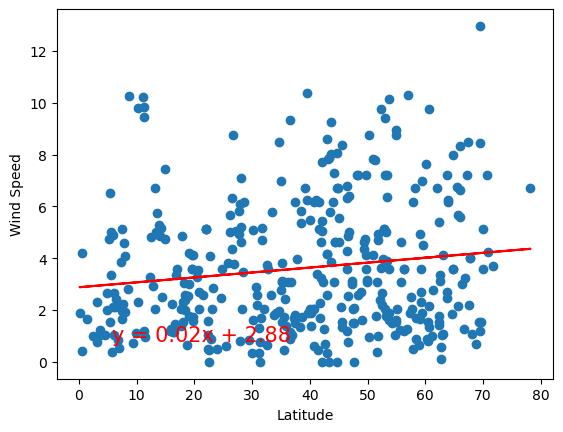

The R values is 0.1445409345129407


In [18]:
# Northern Hemisphere
lat = city_data_df_NH['Lat']
wind = city_data_df_NH['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The R values is {rvalue}')

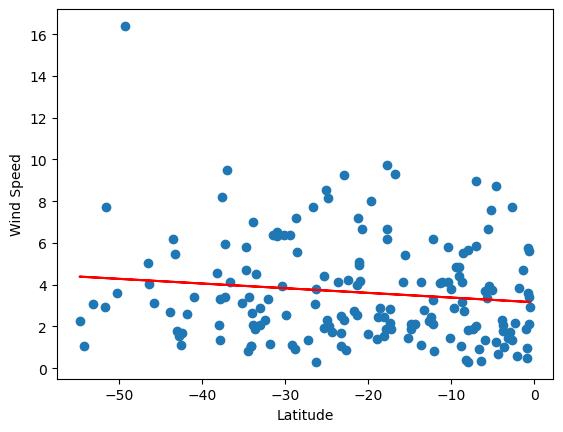

The R values is -0.12927279863512883


In [19]:
# Southern Hemisphere
lat = city_data_df_SH['Lat']
wind = city_data_df_SH['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** Wind speed in the N Hemisphere tends to increase as the latitude increase, whereas the wind speed in the souther hemisphere tends to decrease as the latitude increases.